# РК Торжков Максим ИУ5-61Б Вариант 18

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('HRDataset_v14.csv')

In [3]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


<AxesSubplot:>

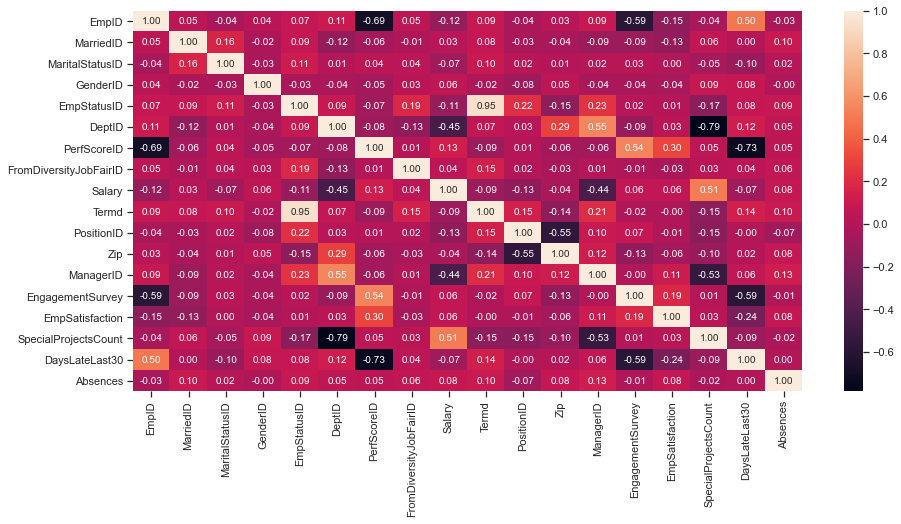

In [4]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [5]:
parts = np.split(data, [10], axis=1)
data = parts[0]

In [6]:
data.drop(['Employee_Name','EmpID','FromDiversityJobFairID','GenderID'], axis = 1, inplace = True)

In [7]:
data.head()

,MarriedID,MaritalStatusID,EmpStatusID,DeptID,PerfScoreID,Salary
0,0,0,1,5,4,62506
1,1,1,5,3,3,104437
2,1,1,5,5,3,64955
3,1,1,1,5,3,64991
4,0,2,5,5,3,50825


In [8]:
data.isnull().sum()
# проверим есть ли пропущенные значения

MarriedID          0
MaritalStatusID    0
EmpStatusID        0
DeptID             0
PerfScoreID        0
Salary             0
dtype: int64

In [9]:
data.head()

,MarriedID,MaritalStatusID,EmpStatusID,DeptID,PerfScoreID,Salary
0,0,0,1,5,4,62506
1,1,1,5,3,3,104437
2,1,1,5,5,3,64955
3,1,1,1,5,3,64991
4,0,2,5,5,3,50825


In [10]:
X = data.drop(['Salary'], axis = 1)
Y = data.Salary
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

   MarriedID MaritalStatusID EmpStatusID DeptID PerfScoreID
0         0               0           1      5           4
1         1               1           5      3           3
2         1               1           5      5           3
3         1               1           1      5           3
4         0               2           5      5           3 

Выходные данные:

 0     62506
1    104437
2     64955
3     64991
4     50825
Name: Salary, dtype: object


In [11]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

     MarriedID MaritalStatusID EmpStatusID DeptID PerfScoreID
167         1               1           1      5           4
291         0               0           1      6           3
189         1               1           1      5           3
259         1               1           5      1           3
254         1               1           1      3           3 

Входные параметры тестовой выборки:

     MarriedID MaritalStatusID EmpStatusID DeptID PerfScoreID
212         0               0           5      4           4
146         1               1           5      5           3
225         0               0           1      5           3
129         1               1           5      5           3
89          1               1           5      5           3 

Выходные параметры обучающей выборки:

 167    77915
291    55875
189    58207
259    55000
254    87826
Name: Salary, dtype: object 

Выходные параметры тестовой выборки:

 212    108987

### Линейная/логистическая регрессия

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [13]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

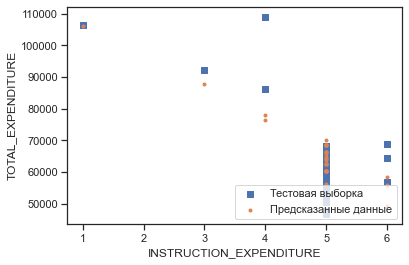

In [14]:
plt.scatter(X_test.DeptID, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.DeptID, lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('INSTRUCTION_EXPENDITURE')
plt.ylabel ('TOTAL_EXPENDITURE')
plt.show()

### Случайный лес

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [17]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 4955.092695026016
Средняя квадратичная ошибка: 43657596.5808585
Median absolute error: 4107.130000000001
Коэффициент детерминации: 0.7916377119625807


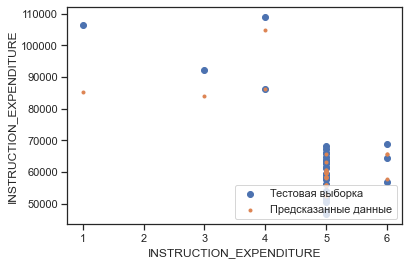

In [18]:
plt.scatter(X_test.DeptID, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.DeptID, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('INSTRUCTION_EXPENDITURE')
plt.ylabel('INSTRUCTION_EXPENDITURE')
plt.show()

## Оценка качества регрессии (Метрики качества)

### Линейная/логистическая регрессия

In [19]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test,lr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 8417.47017473169
Средняя квадратичная ошибка: 113271752.82680161
Median absolute error: 7805.21239167378
Коэффициент детерминации: 0.45939393284536856


### Случайный лес

In [20]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 4955.092695026016
Средняя квадратичная ошибка: 43657596.5808585
Median absolute error: 4107.130000000001
Коэффициент детерминации: 0.7916377119625807


### Вывод

#### Модель "Случайный лес" лучше справился с задачей, чем модель "Линейная/логистическая регрессия"